<a href="https://colab.research.google.com/github/Eric428-a/-LMS-Learning-Management-System/blob/master/1_5_9_Statistical_Arbitrage_Strategy_Using_PCA_%E2%80%93_Starter_Kit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Libraries and Load Data

In [1]:
import pandas as pd  # Import pandas library for data manipulation

In [2]:
import numpy as np  # Import numpy library for numerical computations

In [3]:
import matplotlib.pyplot as plt  # Import matplotlib library for visualization

In [4]:
import seaborn as sns  # Import seaborn library for enhanced visualization

In [5]:
from sklearn.decomposition import PCA  # Import PCA from scikit-learn for dimensionality reduction

In [6]:
from sklearn.preprocessing import StandardScaler  # Import StandardScaler from scikit-learn for data scaling

In [7]:
# load the dataset

In [8]:
data = pd.read_csv('/content/ETFs.csv')  # Load the ETF dataset from a CSV file

# 2. Exploratory Data Analysis (EDA)

In [9]:
# Drop rows with missing values in relevant columns

In [10]:
relevant_columns = ['fund_symbol', 'fund_short_name', 'total_net_assets', 'fund_category', 'fund_family', 'avg_vol_3month']


In [11]:
data.dropna(subset=relevant_columns, inplace=True)  # Remove rows with missing values in relevant columns

In [12]:
# Select relevant columns

In [13]:
data = data[relevant_columns]  # Keep only the relevant columns in the DataFrame

In [14]:
 # Convert 'total_net_assets' to numeric

In [15]:
data['total_net_assets'] = data['total_net_assets'].replace({',': ''}, regex=True).astype(float)  # Convert 'total_net_assets' to numeric


In [16]:
# Convert 'avg_vol_3month' to numeric

In [17]:
data['avg_vol_3month'] = pd.to_numeric(data['avg_vol_3month'], errors='coerce')  # Convert 'avg_vol_3month' to numeric


In [18]:
# Display the first few rows of the modified dataset

In [19]:
print(data.head())  # Print the first few rows of the DataFrame

   fund_symbol                  fund_short_name  total_net_assets  \
1         AADR  AllianzGI Health Sciences Fund       8.883616e+07   
3         ABEQ  Thrivent Large Cap Growth Fund       4.969417e+07   
10        ACWX  Horizon Active Asset Allocation      4.305795e+09   
12        ADIV  DWS RREEF Real Assets Fund - Cl      4.788004e+06   
13        ADRE  DWS RREEF Real Assets Fund - Cl      2.090004e+08   

                fund_category          fund_family  avg_vol_3month  
1        Foreign Large Growth               Virtus            2596  
3                 Large Value       Thrivent Funds            4280  
10        Foreign Large Blend  Horizon Investments         1778880  
12  Pacific/Asia ex-Japan Stk                  DWS             430  
13  Diversified Emerging Mkts                  DWS           10611  


In [20]:
# Summary statistics

In [21]:
print(data.describe())  # Print summary statistics of the DataFrame

       total_net_assets  avg_vol_3month
count      1.604000e+03    1.604000e+03
mean       3.078954e+09    5.979894e+05
std        2.652212e+10    3.496835e+06
min        2.000000e+01    1.900000e+01
25%        3.293672e+07    5.351750e+03
50%        1.417458e+08    2.035100e+04
75%        7.344708e+08    1.138645e+05
max        7.534100e+11    7.694046e+07


In [22]:
# Visualize the distribution of 'total_net_assets' and 'avg_vol_3month'

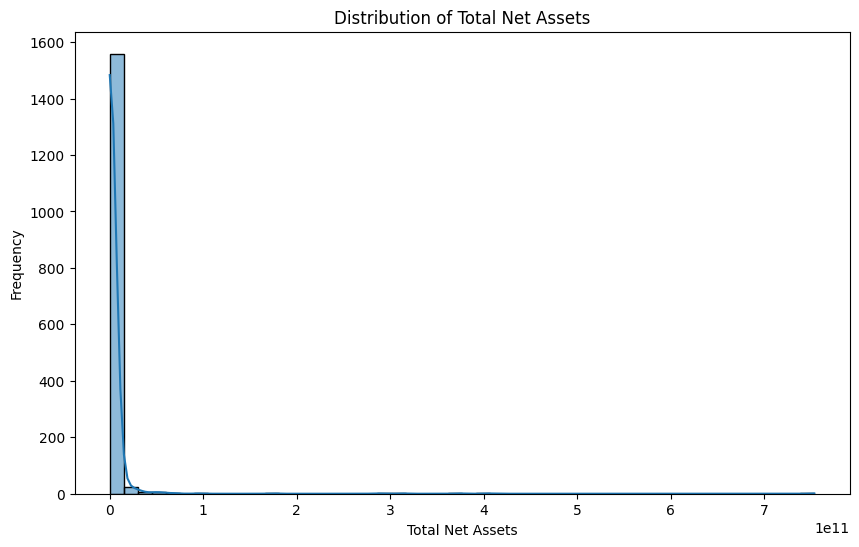

In [23]:
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(data['total_net_assets'], bins=50, kde=True)  # Plot histogram of 'total_net_assets'
plt.title('Distribution of Total Net Assets')  # Set the title of the plot
plt.xlabel('Total Net Assets')  # Set the label for the x-axis
plt.ylabel('Frequency')  # Set the label for the y-axis
plt.show()  # Display the histogram of 'total_net_assets'

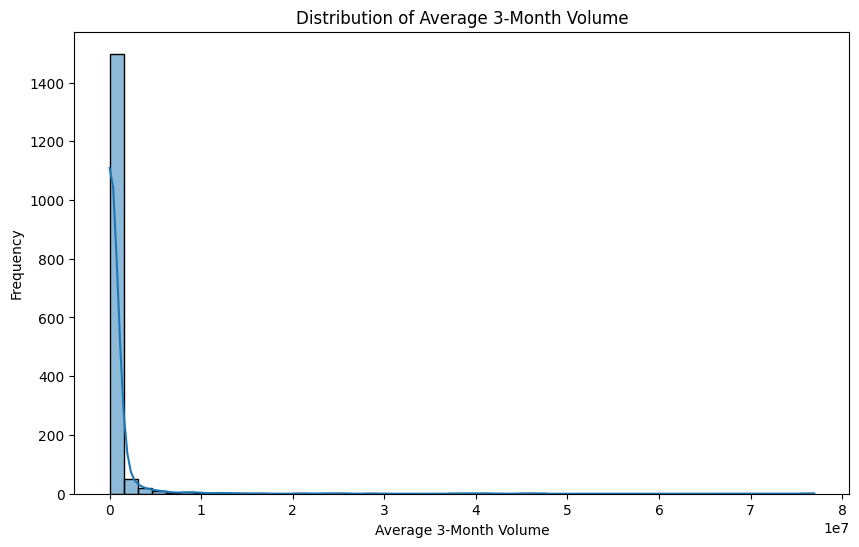

In [24]:
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(data['avg_vol_3month'].dropna(), bins=50, kde=True)  # Plot histogram of 'avg_vol_3month'
plt.title('Distribution of Average 3-Month Volume')  # Set the title of the plot
plt.xlabel('Average 3-Month Volume')  # Set the label for the x-axis
plt.ylabel('Frequency')  # Set the label for the y-axis
plt.show()  # Display the histogram of 'avg_vol_3month'

# Step 3: Data preprocessing

In [25]:
scaler = StandardScaler()  # Initialize StandardScaler

In [26]:
data_scaled = scaler.fit_transform(data[['total_net_assets', 'avg_vol_3month']].dropna())  # Scale the relevant columns


# Step 4: Apply PCA

In [27]:
pca = PCA(n_components=2)  # Initialize PCA with 2 components

In [28]:
principal_components = pca.fit_transform(data_scaled)  # Fit PCA and transform the data

In [29]:
# Create a DataFrame with the principal components

In [30]:
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

In [31]:
# Display the explained variance ratio

In [32]:
print(pca.explained_variance_ratio_)  # Print the explained variance ratio

[0.67012152 0.32987848]


In [33]:
# Plot the principal components

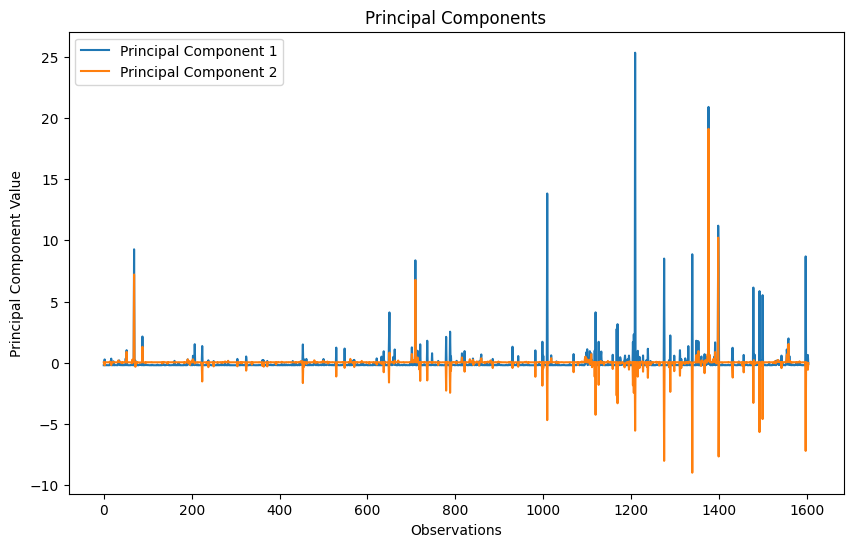

In [34]:
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(pca_df['PC1'], label='Principal Component 1')  # Plot Principal Component 1
plt.plot(pca_df['PC2'], label='Principal Component 2')  # Plot Principal Component 2
plt.title('Principal Components')  # Set the title of the plot
plt.xlabel('Observations')  # Set the label for the x-axis
plt.ylabel('Principal Component Value')  # Set the label for the y-axis
plt.legend()  # Display legend
plt.show()  # Display the plot of principal components

# Step 5: Modeling

In [35]:
# Calculate the cumulative sum of the principal components

In [36]:
pca_df['Cumulative_PC1'] = pca_df['PC1'].cumsum()  # Calculate cumulative sum of PC1

In [37]:
pca_df['Cumulative_PC2'] = pca_df['PC2'].cumsum()  # Calculate cumulative sum of PC2

In [38]:
# Plot the cumulative sum of the principal components

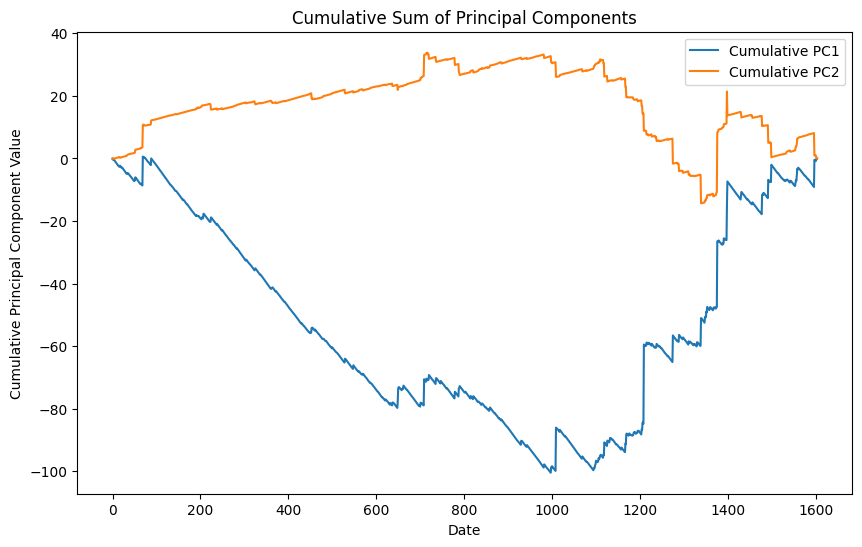

In [39]:
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(pca_df.index, pca_df['Cumulative_PC1'], label='Cumulative PC1')  # Plot cumulative sum of PC1
plt.plot(pca_df.index, pca_df['Cumulative_PC2'], label='Cumulative PC2')  # Plot cumulative sum of PC2
plt.title('Cumulative Sum of Principal Components')  # Set the title of the plot
plt.xlabel('Date')  # Set the label for the x-axis
plt.ylabel('Cumulative Principal Component Value')  # Set the label for the y-axis
plt.legend()  # Display legend
plt.show()  # Display the plot of cumulative sum of principal components

# Step 6: Strategy Implementation

In [40]:
# Create trading signals based on the principal components

In [41]:
pca_df['Signal'] = np.where(pca_df['PC1'] > 0, 1, -1)  # Generate trading signals based on the sign of PC1

In [42]:
# Calculate the returns

In [43]:
data_returns = data['total_net_assets'].pct_change()  # Calculate the percentage change in total_net_assets

In [44]:
# Calculate the strategy returns

In [45]:
pca_df['Strategy_Returns'] = pca_df['Signal'].shift(1) * data_returns  # Calculate the strategy returns based on the signals


In [46]:
# Plot the cumulative returns of the strategy

In [56]:
# Plot the cumulative returns of the strategy with manually set y-axis limits

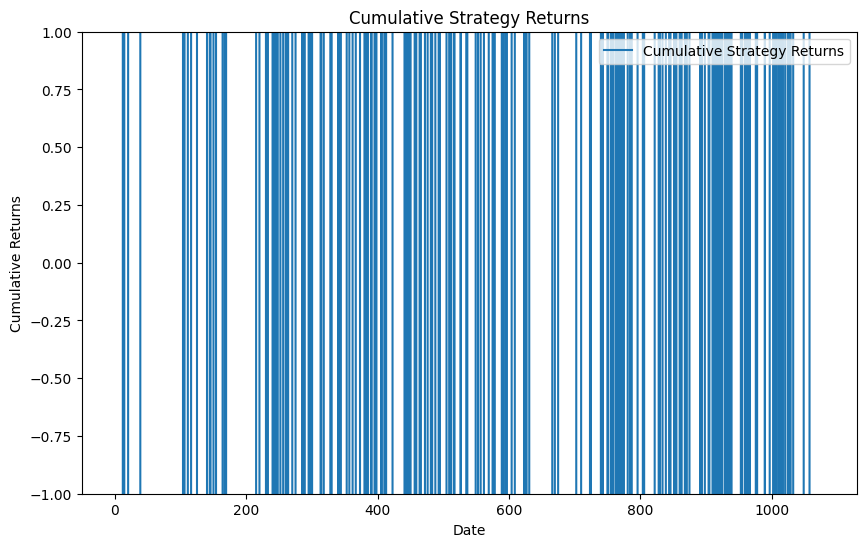

In [57]:
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(pca_df.index, pca_df['Cumulative_Strategy_Returns'], label='Cumulative Strategy Returns')  # Plot the cumulative strategy returns against the index
plt.title('Cumulative Strategy Returns')  # Set the title of the plot
plt.xlabel('Date')  # Set the label for the x-axis to 'Date'
plt.ylabel('Cumulative Returns')  # Set the label for the y-axis to 'Cumulative Returns'
plt.legend()  # Show the legend on the plot
plt.ylim(bottom=-1, top=1)  # Manually set y-axis limits
plt.show()  # Show the plot

# Step 7: Performance Evaluation

In [58]:
# Calculate the total return

In [59]:
total_return = pca_df['Cumulative_Strategy_Returns'].iloc[-1] - 1  # Calculate the total return

In [60]:
print(f'Total Return: {total_return:.2%}')  # Print the total return

Total Return: inf%


In [61]:
# Calculate the Sharpe ratio

In [62]:
sharpe_ratio = pca_df['Strategy_Returns'].mean() / pca_df['Strategy_Returns'].std() * np.sqrt(252)  # Calculate the Sharpe ratio


In [63]:
print(f'Sharpe Ratio: {sharpe_ratio:.2f}')  # Print the Sharpe ratio

Sharpe Ratio: -0.72
